# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [66]:
file_path = "/Users/aman/Desktop/Github-Aman/Practice/BA/Task2/customer_booking.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [67]:
df.shape

(50000, 14)

In [68]:
#Null Values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [70]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [71]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [72]:
#Changing object type to int type
for col in df.select_dtypes("object"):
    df[col] = pd.factorize(df[col])[0]

In [73]:
df.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [74]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,0.017800,84.940480,23.04456,9.06634,3.814420,350.269380,20.004220,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,202.830559,16.711689,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,5.00000,5.00000,2.000000,184.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,0.000000,51.000000,17.00000,9.00000,4.000000,341.000000,10.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,0.000000,115.000000,28.00000,13.00000,5.000000,541.000000,36.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [75]:
df.booking_complete.value_counts(normalize=True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

In [76]:
#Divide X & y variables to build model

X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

In [77]:
# test train split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(X, y, test_size=0.2, random_state=42):

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scale the features using Min-Max scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [78]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

def train_evaluate_model(model, X_train, X_val, y_train, y_val):
    
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds) * 100
    precision = precision_score(y_val, preds) * 100
    recall = recall_score(y_val, preds) * 100
    conf_matrix = confusion_matrix(y_val, preds)
    auc_score = roc_auc_score(y_val, preds)

    return accuracy, precision, recall, conf_matrix, auc_score

In [79]:
def run_models(df, features=None):
 
    model_results = {}
    
    # Model 1: Random Forest Classifier with all features
    X =  df.drop(['booking_complete'], axis=1)
    y = df['booking_complete']
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
    accuracy, precision, recall, conf_matrix, auc_score = train_evaluate_model(rf_model, X_train, X_test, y_train, y_test)
    model_results['all_features'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'conf_matrix': conf_matrix,'auc_score': auc_score}


    # Define colors for bars
    colors = plt.cm.viridis(np.linspace(0, 1, len(X.columns)))

    plt.figure(figsize=(12, 8))
    sorted_indices = np.argsort(rf_model.feature_importances_)
    bars = plt.barh(range(len(X.columns)), rf_model.feature_importances_[sorted_indices], align='center', color=colors)
    plt.yticks(range(len(X.columns)), np.array(X.columns)[sorted_indices])

    # Add labels to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2., '%.2f' % width, ha='left', va='center')

    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.tight_layout()
    plt.show()


    # Model 2: Random Forest Classifier with top 6 features using (top6_features)
    #Top 6 features obtained from bar chart
    top6_features=['purchase_lead', 'route', 'flight_hour', 'booking_origin', 'length_of_stay', 'flight_day']
    df_top6 = df[top6_features]
    X =  df[top6_features]
    y = df['booking_complete']
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
    accuracy, precision, recall, conf_matrix, auc_score = train_evaluate_model(rf_model, X_train, X_test, y_train, y_test)
    model_results['top6_features'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'conf_matrix': conf_matrix,'auc_score': auc_score}

    return model_results

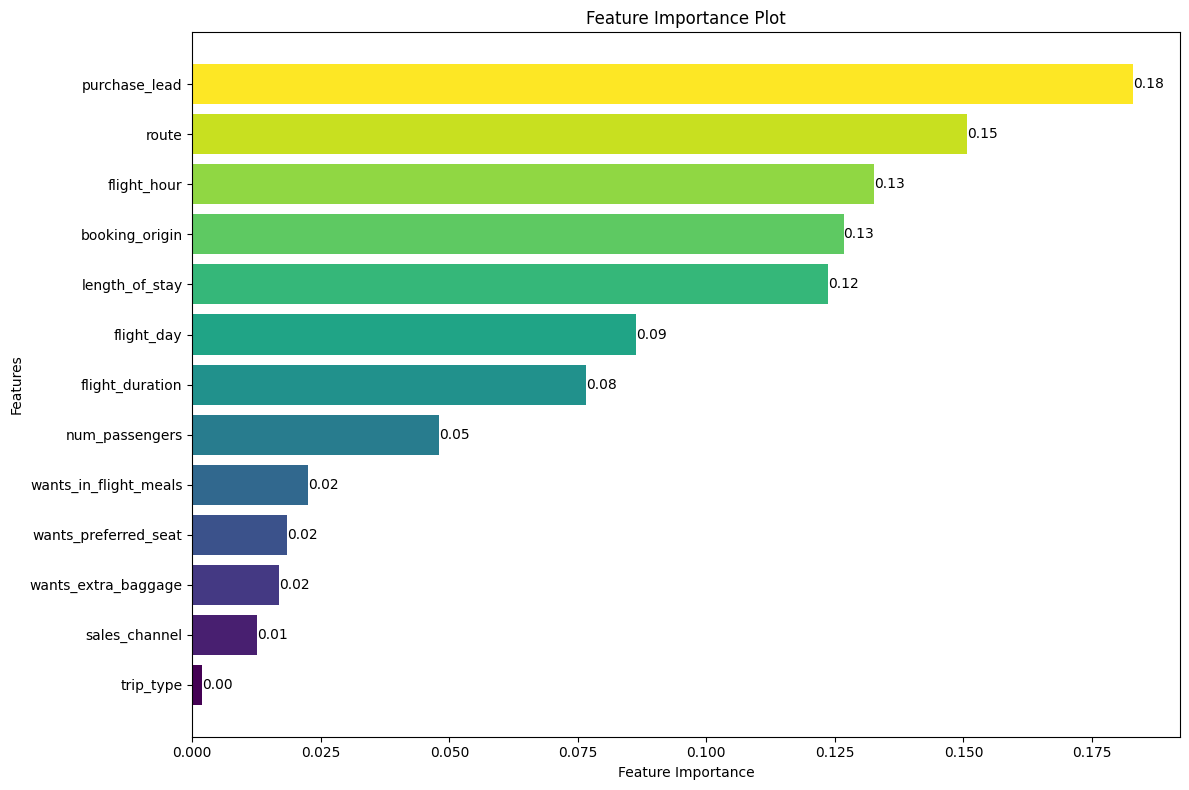

Model Performance Comparison:


,accuracy,precision,recall,conf_matrix,auc_score
all_features,85.51,56.888889,8.648649,"[[8423, 97], [1352, 128]]",0.537551
top6_features,85.11,48.464164,9.594595,"[[8369, 151], [1338, 142]]",0.539111


In [80]:
top6_features=['purchase_lead', 'route', 'flight_hour', 'booking_origin', 'length_of_stay', 'flight_day']
results = run_models(df, top6_features)

# Create DataFrame from model_results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Model Performance Comparison:")
results_df